In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pycaret
# from supervised.automl import AutoML

In [2]:
data = pd.read_excel('database\data_train1.xlsx')

In [44]:
import pandas as pd

# Menghitung persentase data dengan nilai -999 untuk setiap kolom
missing_percentage = (data == -999).mean() * 100

# Menampilkan persentase data dengan nilai -999 untuk setiap kolom
print("Persentase Data dengan Nilai -999:")
print(missing_percentage)


Persentase Data dengan Nilai -999:
latitude             0.000000
longitude            0.000000
Meninggal            0.000000
Hilang               0.000000
Terluka              0.000000
Menderita            0.000000
Mengungsi            0.000000
Rumah                0.000000
Fas_Pendidikan       0.000000
Fas_Kesehatan        0.000000
Fas_Peribadatan      0.000000
Fas_Umum             0.000000
Perkantoran          0.000000
Jembatan             0.000000
Pabrik               0.000000
Pertokoan            0.000000
tanggal              0.000000
hari                 0.000000
bulan                0.000000
tahun                0.000000
hari_dalam_pekan     0.000000
pekan_ke             0.000000
provinsi             0.000000
kabupaten            0.000000
banjir               0.000000
ALLSKY_SFC_SW_DWN    0.000000
ALLSKY_SFC_LW_DWN    0.000000
CLOUD_AMT            0.682749
TS                   0.000000
PRECTOTCORR          0.000000
T10M                 0.000000
T10M_MAX             0.000000
T10M_

In [ ]:
data.info()

In [ ]:
data.columns

In [ ]:
data

In [3]:
X = data[['latitude', 'longitude', 'tanggal', 'hari', 'bulan', 'tahun',
          'hari_dalam_pekan', 'pekan_ke', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN',
          'TS', 'PRECTOTCORR', 'T10M', 'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M',
          'WS10M_MAX', 'RH2M', 'QV2M', 'TQV', 'PS']]

y = data['banjir']

# MLJAR supervised

In [28]:
# automl = AutoML(model_time_limit=1*60,
#                 eval_metric='auc',
#                 mode="Perform",
#                 golden_features=True,
#                 features_selection=True,
#                 stack_models=True,
#                 train_ensemble=True,
#                 explain_level=2,
#                 ml_task='binary_classification',
#                 kmeans_features=True,
#                 results_path='Model_1',
#                 validation_strategy={
#                     "validation_type": "kfold",
#                     "k_folds": 5,
#                     "shuffle": True,
#                     "stratify": True,
#                     "random_seed": 123
#                     },
#                 start_random_models=10,
#                 top_models_to_improve=3
#                 )

In [ ]:
# automl.fit(X, y)

In [6]:
automl = AutoML(results_path='Model_1')

# PANDAS PROFILING

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling")

In [ ]:
profile

# TPOT

In [4]:
from tpot import TPOTClassifier

In [27]:
pipeline_optimizer = TPOTClassifier(generations=10, scoring='accuracy',
                                    cv=5, population_size=20, verbosity=2)

In [ ]:
pipeline_optimizer.fit(X_train, y_train)

In [ ]:
pipeline_optimizer.score(X_test, y_test)

In [16]:
pipeline_optimizer.export('tpot_exported_pipeline.py')

# PYCARET

In [6]:
from pycaret.classification import *
from pycaret.classification import load_model

In [16]:
model = setup(data=X, target=y, feature_selection=True, n_features_to_select=5,
              feature_selection_method='sequential', multicollinearity_threshold=0.9,
              fold_strategy='kfold', fold=10, log_plots=True,
              log_profile=True, log_data=True, profile=True)

,Description,Value
0,Session id,6394
1,Target,banjir
2,Target type,Binary
3,Original data shape,"(4394, 23)"
4,Transformed data shape,"(4394, 25)"
5,Transformed train set shape,"(3075, 25)"
6,Transformed test set shape,"(1319, 25)"
7,Numeric features,21
8,Date features,1
9,Preprocess,True


Loading profile... Please Wait!


In [17]:
best_model = compare_models(sort='AUC', exclude='dummy', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9428,0.9876,0.9399,0.9452,0.9424,0.8853,0.8855,1.1240
lightgbm,Light Gradient Boosting Machine,0.9424,0.9873,0.9345,0.9494,0.9418,0.8846,0.8849,1.0360
rf,Random Forest Classifier,0.9412,0.9870,0.9373,0.9445,0.9408,0.8821,0.8823,1.1750
gbc,Gradient Boosting Classifier,0.9346,0.9853,0.9305,0.9379,0.9340,0.8690,0.8693,1.2530
et,Extra Trees Classifier,0.9470,0.9846,0.9470,0.9466,0.9467,0.8938,0.8939,1.1470
ada,Ada Boost Classifier,0.9252,0.9779,0.9305,0.9214,0.9257,0.8501,0.8506,1.0680
lda,Linear Discriminant Analysis,0.8998,0.9674,0.9402,0.8705,0.9037,0.7995,0.8026,1.0600
lr,Logistic Regression,0.8972,0.9654,0.9129,0.8852,0.8987,0.7942,0.7949,1.6310
knn,K Neighbors Classifier,0.9031,0.9579,0.8823,0.9209,0.9010,0.8059,0.8069,1.0270
nb,Naive Bayes,0.8898,0.9551,0.9369,0.8568,0.8948,0.7790,0.7830,0.9840


In [13]:
best_model

[XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=-1, num_parallel_tree=None,
               objective='binary:logistic', predictor=None, ...),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
        

In [18]:
pull().to_excel('metrik_model.xlsx', index=False)

In [24]:
folds = [3, 5, 7, 10]

for fold in folds:
    xgb = create_model('xgboost', return_train_score=True, round=3, fold=fold)

In [20]:
folds = [3, 5, 7, 10]

for fold in folds:
    rf = create_model('rf', return_train_score=True, round=3, fold=fold)

In [21]:
folds = [3, 5, 7, 10]

for fold in folds:
    lgbm = create_model('lightgbm', rlgbmurn_train_score=True, round=3, fold=fold)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.940,0.987,0.925,0.956,0.941,0.881,0.881
1,0.940,0.984,0.935,0.942,0.938,0.879,0.879
2,0.937,0.986,0.931,0.941,0.936,0.873,0.873
Mean,0.939,0.986,0.930,0.946,0.938,0.878,0.878
Std,0.002,0.001,0.004,0.007,0.002,0.003,0.003


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.932,0.985,0.930,0.936,0.933,0.863,0.863
1,0.945,0.989,0.935,0.954,0.944,0.889,0.890
2,0.941,0.984,0.935,0.942,0.939,0.883,0.883
3,0.937,0.988,0.952,0.926,0.939,0.873,0.873
4,0.941,0.988,0.928,0.953,0.940,0.883,0.883
Mean,0.939,0.987,0.936,0.942,0.939,0.878,0.878
Std,0.005,0.002,0.009,0.010,0.003,0.009,0.009


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.955,0.990,0.961,0.952,0.957,0.909,0.909
1,0.930,0.986,0.921,0.941,0.931,0.859,0.859
2,0.936,0.987,0.918,0.945,0.931,0.872,0.872
3,0.945,0.982,0.944,0.944,0.944,0.891,0.891
4,0.950,0.990,0.955,0.946,0.950,0.900,0.900
5,0.945,0.989,0.943,0.952,0.947,0.890,0.891
6,0.957,0.988,0.943,0.966,0.954,0.913,0.913
Mean,0.945,0.987,0.941,0.950,0.945,0.891,0.891
Std,0.009,0.003,0.015,0.008,0.010,0.018,0.018


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.945,0.990,0.946,0.952,0.949,0.889,0.889
1,0.922,0.981,0.914,0.926,0.920,0.844,0.844
2,0.961,0.993,0.949,0.974,0.962,0.922,0.922
3,0.932,0.983,0.906,0.951,0.928,0.863,0.864
4,0.958,0.986,0.953,0.960,0.957,0.916,0.916
5,0.938,0.984,0.924,0.944,0.934,0.876,0.876
6,0.938,0.990,0.944,0.938,0.941,0.876,0.876
7,0.935,0.988,0.948,0.924,0.936,0.870,0.870
8,0.945,0.989,0.937,0.955,0.946,0.889,0.889


In [29]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6394, reg_alpha=0.0, reg_lambda=0.0,
               rlgbmurn_train_score=True, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [30]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6394, verbose=0, warm_start=False)

In [31]:
xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
lgbm_tune = tune_model(lgbm, fold=fold, optimize='AUC', search_library='optuna', return_train_score=True)
rf_tune = tune_model(rf, fold=fold, optimize='AUC', search_library='optuna', return_train_score=True)
xgb_tune = tune_model(xgb, fold=fold, optimize='AUC', search_library='optuna', return_train_score=True)

In [39]:
final_rf = finalize_model(rf)
final_lgbm = finalize_model(lgbm)
final_xgb = finalize_model(xgb)

In [40]:
print(final_rf)

Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['tanggal'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['latitude', 'longitude', 'hari',
                                             'bulan', 'tahun',
                                             'hari_dal...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                      

In [41]:
print(final_lgbm)

Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['tanggal'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['latitude', 'longitude', 'hari',
                                             'bulan', 'tahun',
                                             'hari_dal...
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                         

In [42]:
print(final_xgb)

Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['tanggal'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['latitude', 'longitude', 'hari',
                                             'bulan', 'tahun',
                                             'hari_dal...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                          

In [43]:
save_model(final_lgbm,'lgbm_model')
save_model(final_rf,'rf_model')
save_model(final_xgb,'xgb_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Acer\AppData\Local\Temp\joblib),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['tanggal'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['latitude', 'longitude', 'hari',
                                              'bulan', 'tahun',
                                              'hari_dal...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
            

In [ ]:
get_leaderboard()

In [ ]:
folds = [3, 5, 7, 10]

for fold in folds:
    xgb = create_model('xgboost', return_train_score=True, round=3, fold=fold)

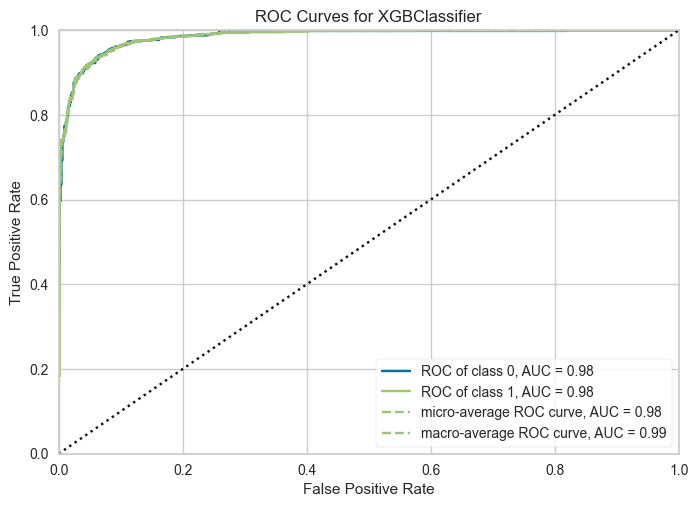

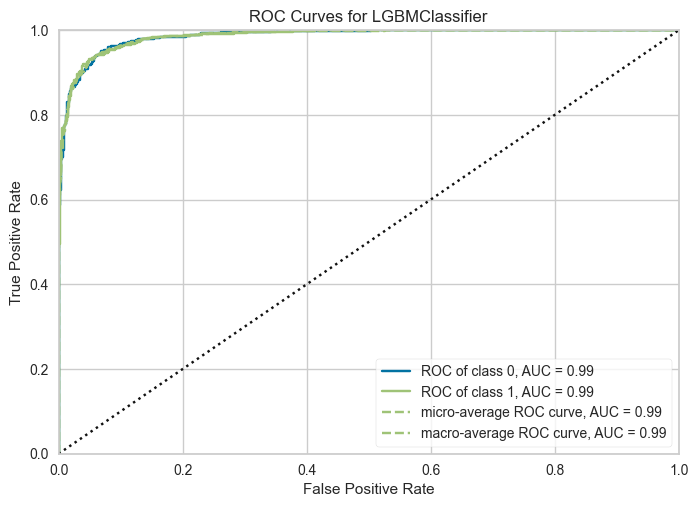

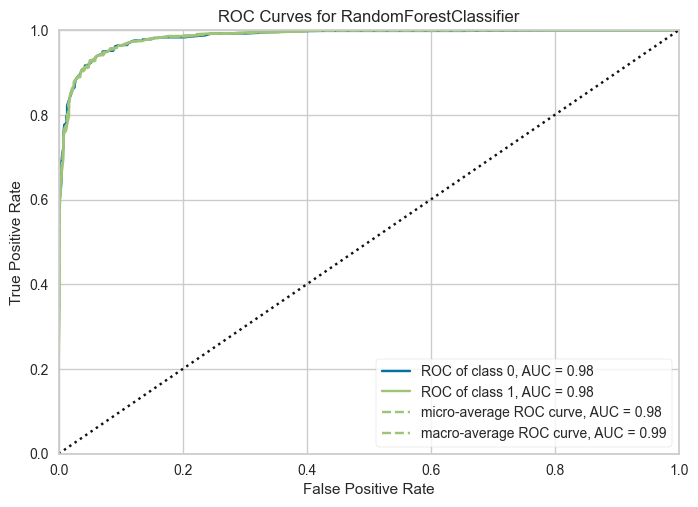

In [32]:
plot_model(xgb, plot='auc')
plot_model(lgbm, plot='auc')
plot_model(rf, plot='auc')

In [ ]:
plot_model(xgb, plot='confusion_matrix')
plot_model(lgbm, plot='confusion_matrix')
plot_model(rf, plot='confusion_matrix')

In [ ]:
plot_model(xgb, plot='rfe')
plot_model(lgbm, plot='rfe')
plot_model(rf, plot='rfe')

In [ ]:
plot_model(xgb, plot='vc')
plot_model(lgbm, plot='vc')
plot_model(rf, plot='vc')

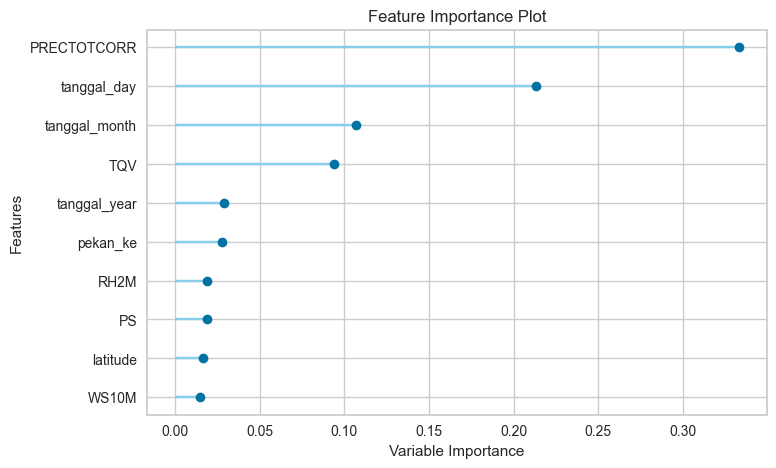

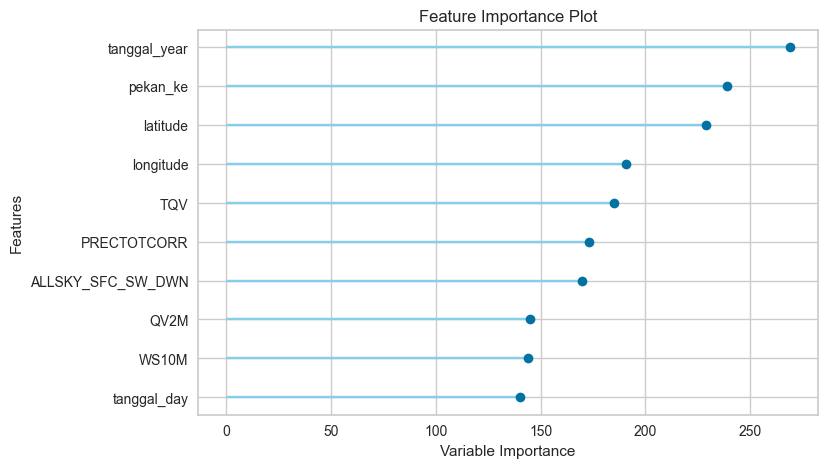

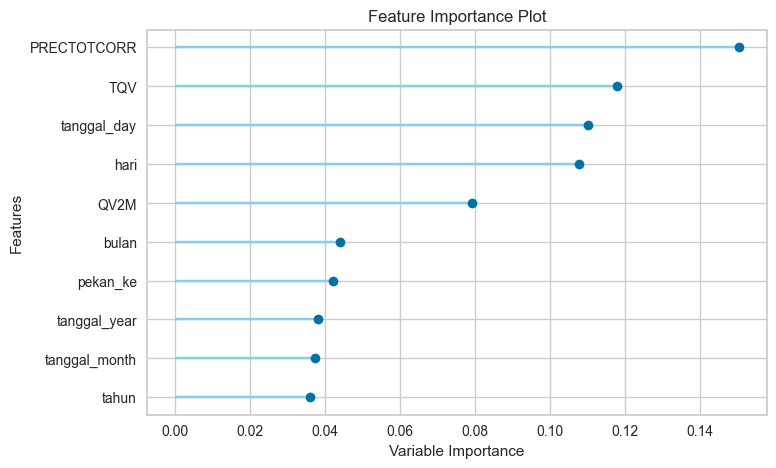

In [35]:
plot_model(xgb, plot='feature')
plot_model(lgbm, plot='feature')
plot_model(rf, plot='feature')

In [ ]:
best = compare_models(sort='AUC')

In [ ]:
# Mulai loop
models = []
results = []

fold_values = [3, 5, 7, 10]  # Nilai 'fold' yang akan digunakan

for fold in fold_values:
    model = compare_models(sort='AUC', return_train_score=True, fold=fold)
    model_results = pull().loc[['Mean']]
    models.append(model)
    results.append(model_results)

results = pd.concat(results, axis=0)
results.index = fold_values
results.plot()

In [ ]:
models()

In [ ]:
# model = load_model('ExtraTreesClassifier.pkl')

In [ ]:
best = compare_models(sort='AUC', return_train_score=True, fold=i)

In [ ]:
best

In [77]:
best_auc_model = automl(optimize = 'AUC')

In [ ]:
best_auc_model

In [ ]:
best = tune_model(best, n_iter=200)

In [ ]:
evaluate_model(best)

In [ ]:
plot_model(best, plot='pipeline')

In [22]:
plot_model(best, plot='auc', save=True)

'AUC.png'

In [26]:
plot_model(best, plot='confusion_matrix', save=True)

'Confusion Matrix.png'

In [25]:
plot_model(best, plot='rfe', save=True)

'Feature Selection.png'

In [ ]:
plot_model(lgbm, plot='feature_all')

In [ ]:
plot_model(lgbm, plot='parameter')

In [ ]:
plot_model(rf, plot='vc')

In [ ]:
save_model(best, 'ExtraTreesClassifier')

In [ ]:
ensemble1 = ensemble_model(best, method = 'Bagging', n_estimators=3,
                           choose_better=True, optimize='AUC')